In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [135]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [33]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Define the path to your saved model
model_path = '/content/drive/My Drive/Emotion_model/DeepS_emotion_model.keras'

# Load the model
try:
    loaded_model = load_model(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

Model loaded successfully.


In [132]:
file_path = '/content/drive/My Drive/Emotion_model/Sample_Images/Lele.png'

In [129]:

if os.path.exists(file_path):
    print("File exists on disk. Proceeding to check if it's readable.")
else:
    print("File does NOT exist. Please re-check the path or upload the file.")

File exists on disk. Proceeding to check if it's readable.


In [133]:

# 1. Load the image in grayscale
new_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

if new_image is not None:
    # 2. Resize the image to match your model's input size (e.g., 48x48)
    resized_image = cv2.resize(new_image, (48, 48))

    # 3. Reshape the image to add the channel and batch dimensions
    # For a grayscale image, the shape should be (1, 48, 48, 1)
    reshaped_image = np.expand_dims(resized_image, axis=-1)
    final_input = np.expand_dims(reshaped_image, axis=0)

    # 4. Normalize the pixel values (if you did this during training)
    final_input = final_input / 255.0

    print("Image preprocessed successfully.")
else:
    print("Error: The image could not be read by OpenCV.")

Image preprocessed successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


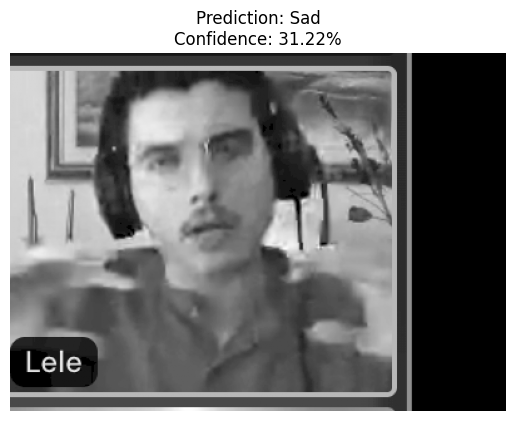

The model predicted the emotion: Sad
Prediction confidence: 31.22%


In [136]:
predictions = loaded_model.predict(final_input)

# Get the predicted class index (the one with the highest probability)
predicted_class_index = np.argmax(predictions)

# Use your emotion_map to get the emotion label
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
predicted_emotion = emotion_map[predicted_class_index]

# Get the confidence score
confidence = np.max(predictions) * 100

plt.imshow(new_image, cmap='gray')
plt.title(f"Prediction: {predicted_emotion}\nConfidence: {confidence:.2f}%")
plt.axis('off')
plt.show()

print(f"The model predicted the emotion: {predicted_emotion}")
print(f"Prediction confidence: {confidence:.2f}%")